In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [42]:
# Load datasets
df1 = pd.read_csv("purchase_behaviour.csv")
df2 = pd.read_csv("transaction_data.csv")

In [43]:
df2['DATE'] = pd.to_datetime(df2['DATE'], unit='D', origin='1899-12-30')
df2['YEAR_MONTH'] = df2['DATE'].dt.to_period('M')

In [44]:
merged_df = df2.merge(df1, on="LYLTY_CARD_NBR", how="left").dropna()

In [45]:
#Top 3 Most Profitable Products
top_products = merged_df.groupby('PROD_NAME', as_index=False)['TOT_SALES'].sum().nlargest(3, 'TOT_SALES')

<ipython-input-46-45ddbc075c32>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="PROD_NAME", y="TOT_SALES", palette="viridis")


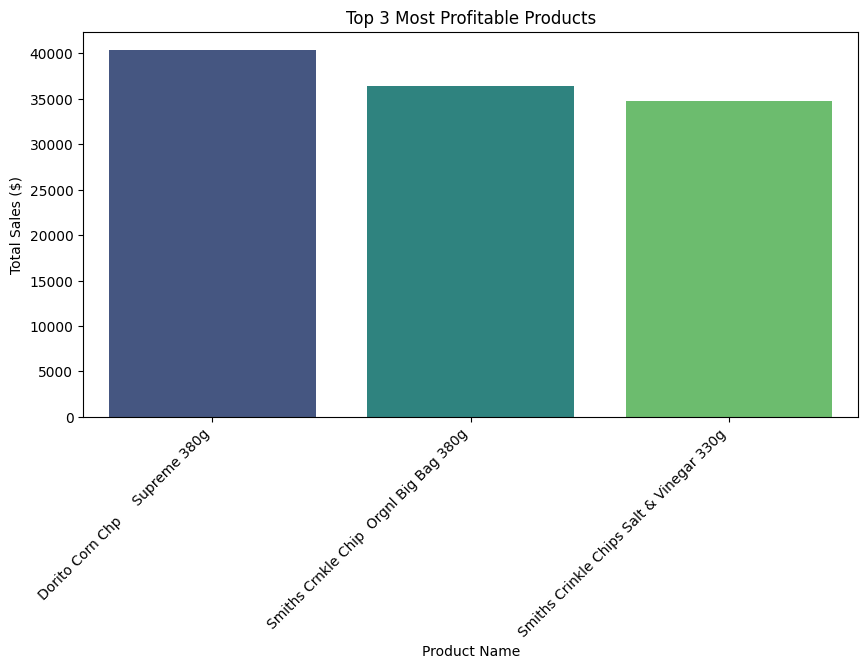

In [46]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, x="PROD_NAME", y="TOT_SALES", palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Top 3 Most Profitable Products")
plt.ylabel("Total Sales ($)")
plt.xlabel("Product Name")
plt.show()

In [47]:
#Customer Segments Analysis
customer_sales = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], as_index=False)['TOT_SALES'].sum()

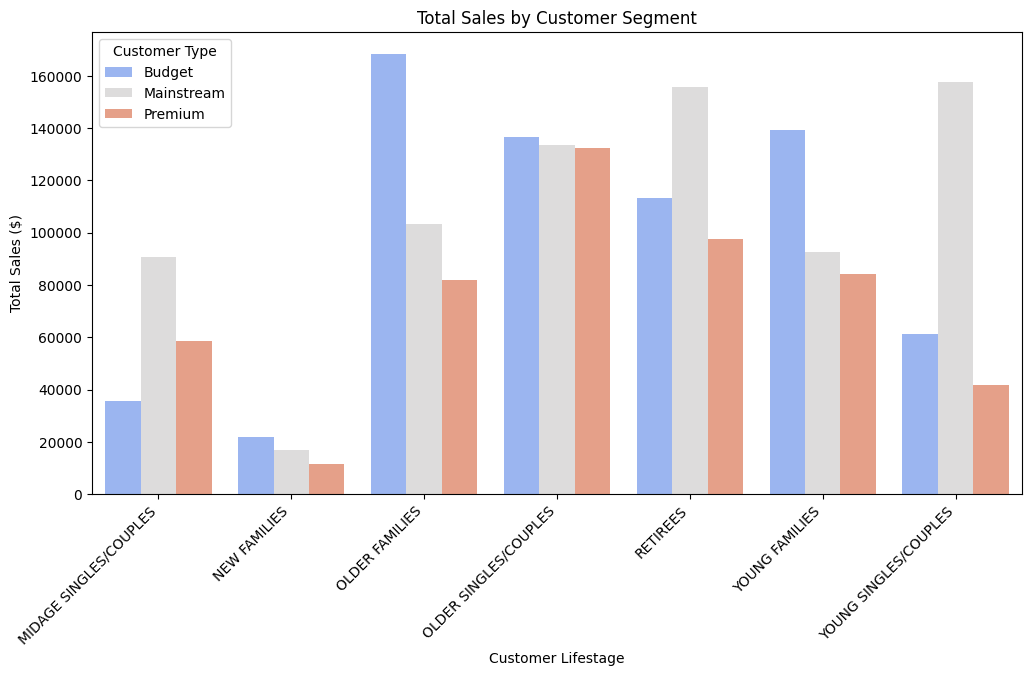

In [48]:

plt.figure(figsize=(12, 6))
sns.barplot(data=customer_sales, x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Total Sales by Customer Segment")
plt.ylabel("Total Sales ($)")
plt.xlabel("Customer Lifestage")
plt.legend(title="Customer Type")
plt.show()

In [49]:
#Most Frequent (Loyal) Customers
loyal_customers = merged_df['LYLTY_CARD_NBR'].value_counts().head(10).reset_index()
loyal_customers.columns = ['Customer_ID', 'Purchase_Count']

<ipython-input-50-a10e13683334>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loyal_customers, x="Customer_ID", y="Purchase_Count", palette="Blues_r")


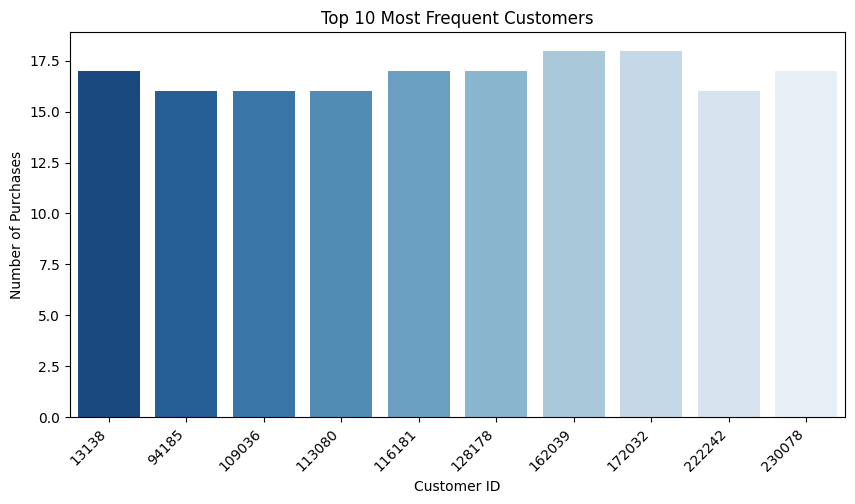

In [50]:

plt.figure(figsize=(10, 5))
sns.barplot(data=loyal_customers, x="Customer_ID", y="Purchase_Count", palette="Blues_r")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Frequent Customers")
plt.ylabel("Number of Purchases")
plt.xlabel("Customer ID")
plt.show()

In [51]:
#Monthly Analysis: Most Profitable Product Each Month
monthly_sales = merged_df.groupby(['YEAR_MONTH', 'PROD_NAME'], as_index=False)['TOT_SALES'].sum()
most_profitable_per_month = monthly_sales.loc[monthly_sales.groupby('YEAR_MONTH')['TOT_SALES'].idxmax()]


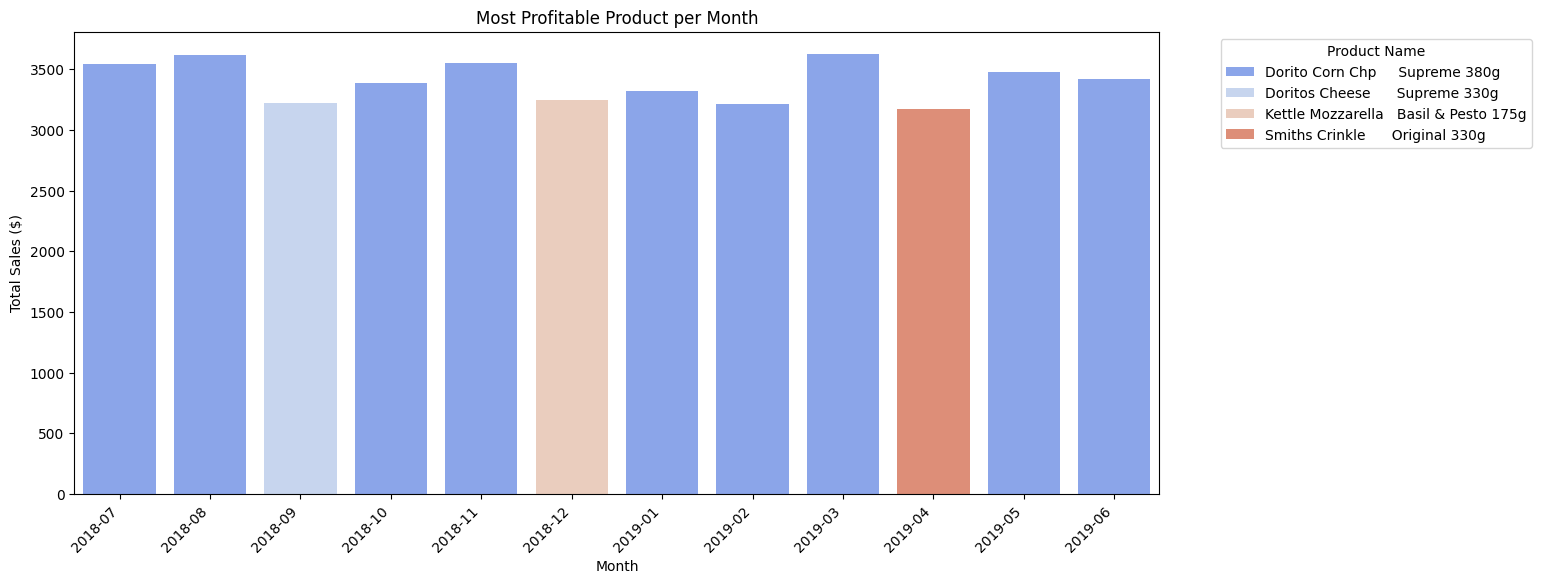

In [52]:

plt.figure(figsize=(14, 6))
sns.barplot(data=most_profitable_per_month, x=most_profitable_per_month['YEAR_MONTH'].astype(str),
            y="TOT_SALES", hue="PROD_NAME", palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Most Profitable Product per Month")
plt.ylabel("Total Sales ($)")
plt.xlabel("Month")
plt.legend(title="Product Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [53]:
# Most Loyal Customer Segments (Based on Repeat Buyers)
loyalty_analysis = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], as_index=False)['LYLTY_CARD_NBR'].nunique()
loyalty_analysis = loyalty_analysis.rename(columns={"LYLTY_CARD_NBR": "Unique_Customers"})


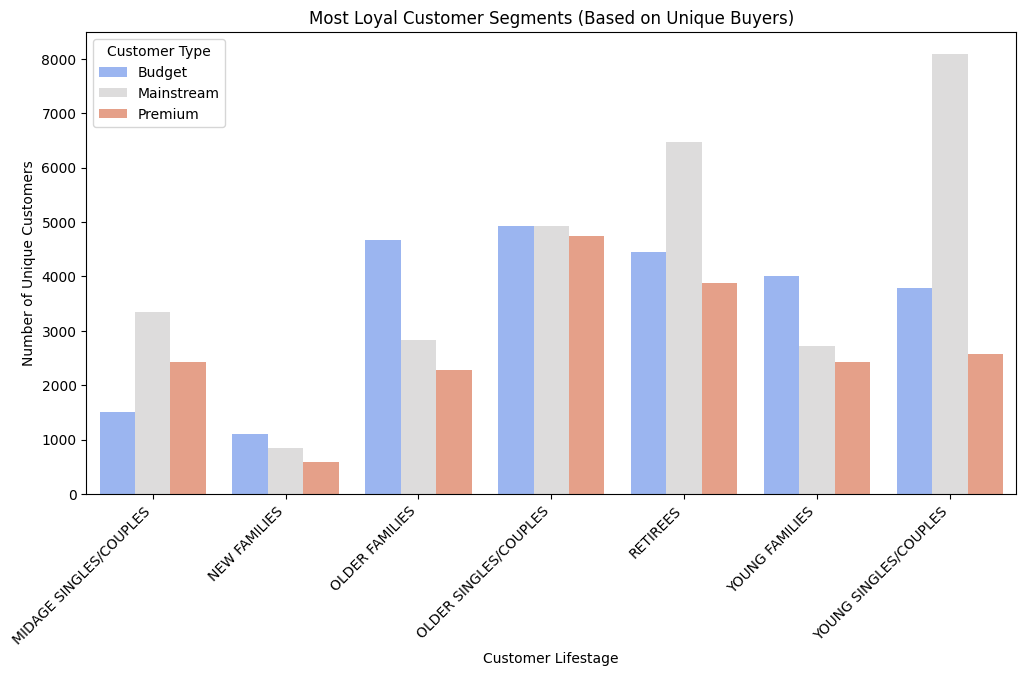

In [54]:

plt.figure(figsize=(12, 6))
sns.barplot(data=loyalty_analysis, x="LIFESTAGE", y="Unique_Customers", hue="PREMIUM_CUSTOMER", palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Most Loyal Customer Segments (Based on Unique Buyers)")
plt.ylabel("Number of Unique Customers")
plt.xlabel("Customer Lifestage")
plt.legend(title="Customer Type")
plt.show()